# PROJECT ANALYSIS

#### Importing Necessary Packages

In [1]:
# numpy for numerical operations
import numpy as np
# pandas for data analysis and data manipulation
import pandas as pd
# matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
plt.style.use('seaborn-whitegrid')
# To filter warnings
import warnings 
warnings.filterwarnings('ignore')

#### Loading Data

#### First Dataframe

In [2]:
# Loading the first dataframe
df1 = pd.read_csv ("C:\\Users\\User-PC\\Project_Dataset\\dsc-phase-1-project-v2-4\\zippedData\\bom.movie_gross.csv")
#Display top rows of the dataset
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Display bottom five rows of the data set
df1.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


#### Data Understanding

#### General Data Overview

In [4]:
# Number of rows and columns
df1.shape

(3387, 5)

In [5]:
# Column overview(number of none missing values,datatype)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
# Statistical summary of the dataset
df1.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


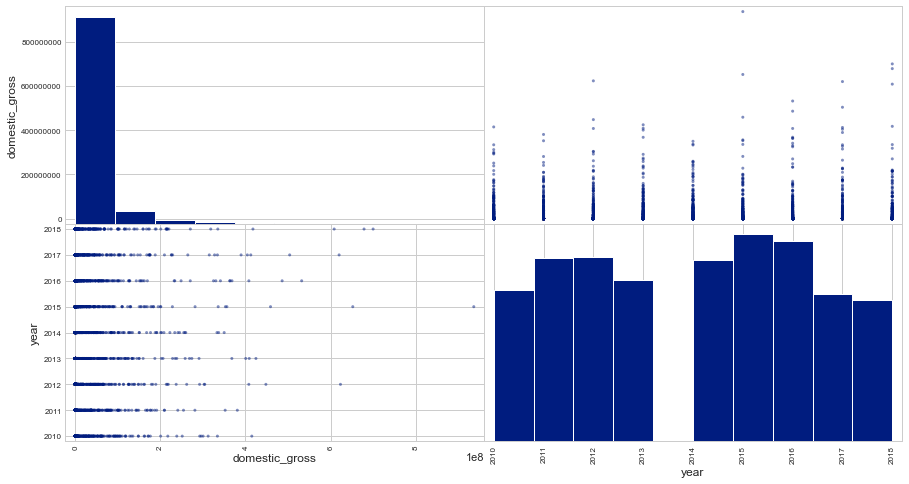

In [7]:
# Relationship Between Variables
plt.style.use('seaborn-dark-palette')
pd.plotting.scatter_matrix(df1,);

In [8]:
# Checking missing values
missing = df1.isna().sum()
missing

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [9]:
# Percentage of missing values
per_missing = missing*100/len(df1)
per_missing.sort_values(ascending = False)

foreign_gross     39.858282
domestic_gross     0.826690
studio             0.147623
title              0.000000
year               0.000000
dtype: float64

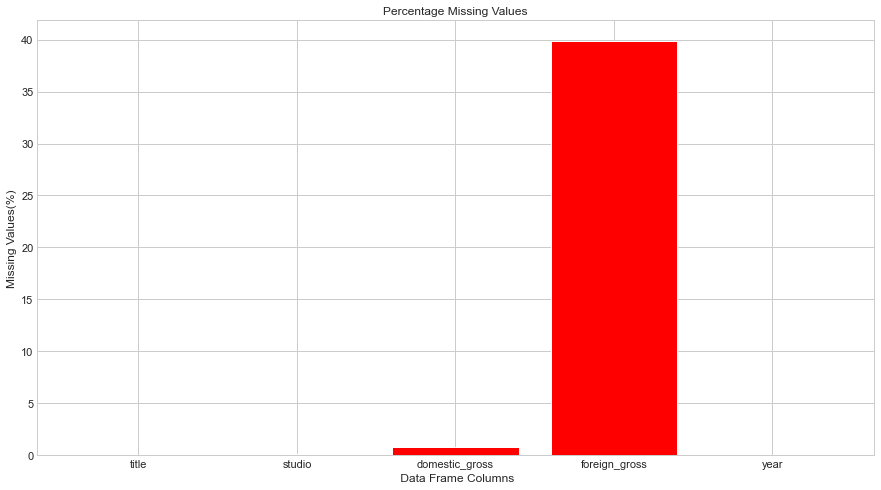

In [10]:
# Visualising missing values
fig, ax = plt.subplots()
x = per_missing.index.tolist()
y = []
for value in per_missing:
    y.append(value)
ax.bar(x,y,color = 'red')
ax.set_title('Percentage Missing Values')
ax.set_xlabel(' Data Frame Columns')
ax.set_ylabel('Missing Values(%)')
ax.set_xticks(x,rotation = '90');

In [11]:
# Check for duplicates
dup_data = df1.duplicated().any()
dup_data 

False

#### Data Cleaning/Preparation

#### Handling Missing Values

####### The foreign_gross column has 39% of its values missing. we can fill in the missing values but that will require us to know whether the data is skewed or not. If the data is skewed then we use the median otherwise the mean.

In [12]:
# Converting foreign_gross datatype to allow for numeric operations
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '').astype('float')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [13]:
# Check whether it appears in the numeric operations 
df1.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.037000e+03,3387.000000
mean,2.874585e+07,7.487281e+07,2013.958075
std,6.698250e+07,1.374106e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.700000e+06,2012.000000
50%,1.400000e+06,1.870000e+07,2014.000000
75%,2.790000e+07,7.490000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


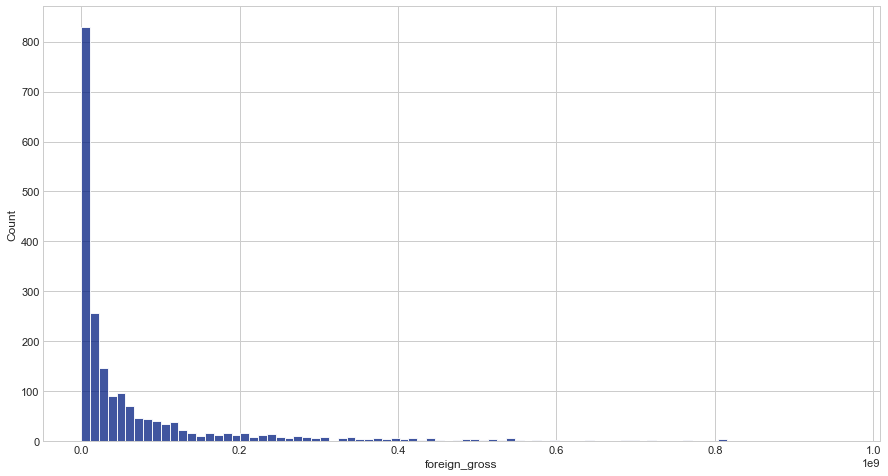

In [14]:

sns.histplot(data = df1['foreign_gross']);

The data is positively skewed hence prompting the use of the median to fill in missing values as it will be the best measure for central tendency given that it is unaffected by extreme outliers or non-symmetric distributions of data.

In [15]:
# filling missing values
df1.fillna({'foreign_gross': df1['foreign_gross'].median()},inplace = True)
df1['foreign_gross'].isna().sum()

0

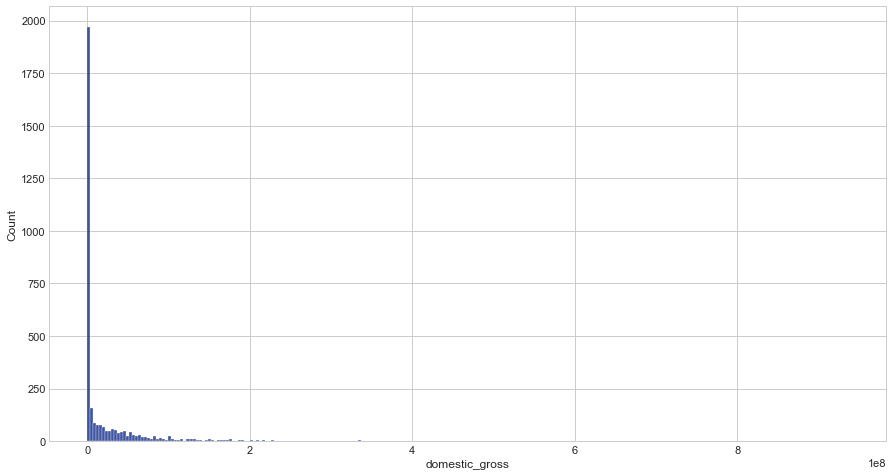

In [16]:
# Visualizing the domestic_gross disribution
sns.histplot(data = df1['domestic_gross']);


The domestic_gross data is positively skewed hence making the median the best measure for central tendency as it is unaffected by extreme outliers or non-symmetric distributions of values. For this reason we will use it to fill in our missing values.

In [17]:
# filling in the domestic_gross missing values with the median
df1.fillna({'domestic_gross':df1['domestic_gross'].median()},inplace = True)
df1['domestic_gross'].isna().sum()

0

for the studio given that its a categorical data the best measure for central tendency would be the mode so we use it to fill in the missing values.

In [18]:
# filling in studio missing values with the mode
df1.fillna({'studio': df1['studio'].mode()[0]},inplace = True)
df1['studio'].isna().sum()

0

#### Checking for Outliers

To visualize the outliers in the dataset,we will come up with a function that generates a box plot for our individual columns.

In [19]:
# Define a function called Plot_boxplt
def plot_boxplt(df,ft):
    df.boxplot(column = [ft])
    plt.grid(False)
    plt.show()

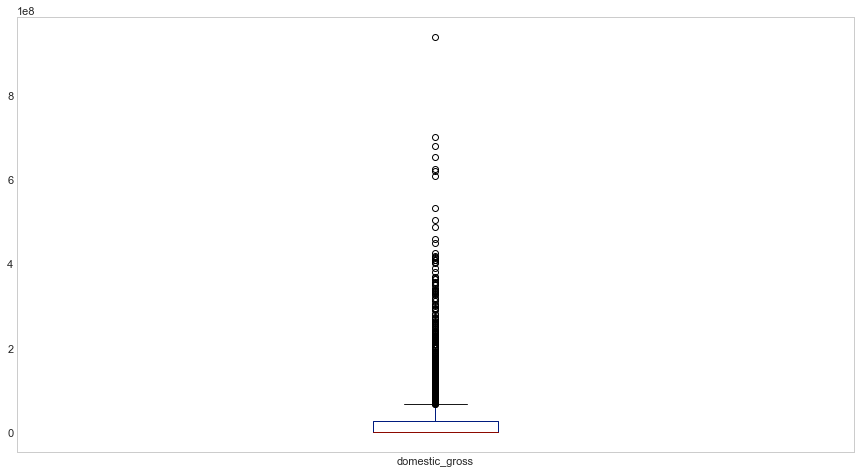

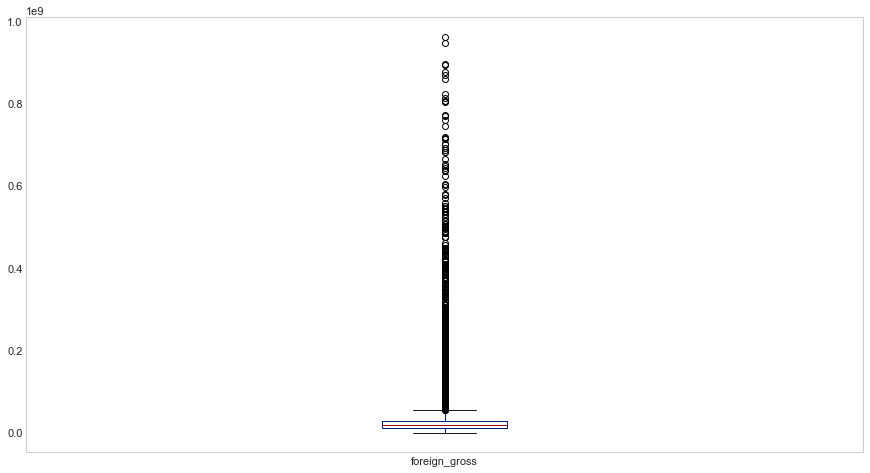

In [20]:
#Generate boxplots
plot_boxplt (df1, 'domestic_gross')
plot_boxplt (df1, 'foreign_gross')


In [21]:
#Define a function that returns a list of outlier indices
def outliers (df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    ls = df.index[(df[ft] < lower_bound)| (df[ft] > upper_bound)]
    
    return ls
    

In [22]:
# Number of domestic_gross outliers
domestic_gross_list = []
for i in ['domestic_gross']:
    domestic_gross_list.extend (outliers(df1,'domestic_gross'))
len(domestic_gross_list)*100/len(df1)

100.0

In [23]:
#Number of foreign_gross outliers
foreign_gross_list = []
for i in ['foreign_gross']:
    foreign_gross_list.extend (outliers(df1,'foreign_gross'))

len(foreign_gross_list)    
    

2931

There are too many outliers in the data analyzed above, and removing them could make the findings erroneous or inconclusive.

#### Data Analysis

#### Adding Necessary Columns

In [24]:
#Adding a total_gross column
total_gross = df1['foreign_gross'] + df1['domestic_gross']
df1['total_gross'] = total_gross
df1.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [25]:
# Top 10 studios with the highest total_gross
df1_grouped = df1.groupby('studio')['total_gross'].sum().sort_values(ascending = False).head(10)
df1_studio_list = df1_grouped.index.tolist()
print(df1_studio_list)
values = []
for value in df1_grouped:
    values.append(value)
print(values)

['BV', 'Fox', 'WB', 'Uni.', 'Sony', 'Par.', 'WB (NL)', 'LGF', 'LG/S', 'P/DW']
[44250283899.1, 31042766596.0, 31022948998.0, 29813264191.4, 22481238096.0, 19680155697.0, 10353399999.0, 8883482700.0, 5506723998.0, 5076500000.0]


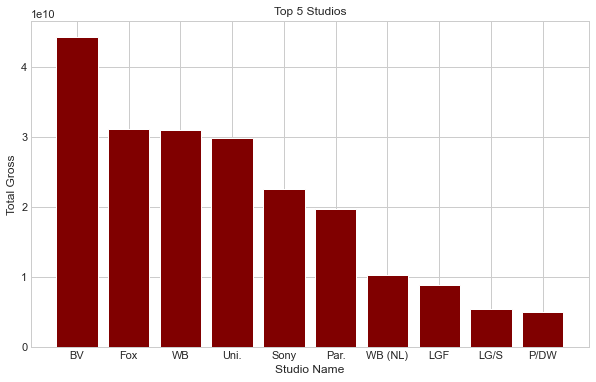

In [26]:
# Visualizing the top 5 studios in terms of gross
x = df1_studio_list
y = values
studio_gross_figure,ax = plt.subplots(figsize = (10, 6))
# creating the bar plot
ax.bar(x, y,color='maroon')
ax.set_xlabel("Studio Name")
ax.set_ylabel("Total Gross")
ax.set_title("Top 5 Studios");


Microsoft should consider investing in BV studios as using the analysis above it will generate the highest total gross. 

#### Second DataFrame

In [27]:
# Importing Data
df2 = pd.read_csv("C:\\Users\\User-PC\\Project_Dataset\\dsc-phase-1-project-v2-4\\zippedData\\tn.movie_budgets.csv")


In [28]:
#Display top rows of the dataset
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
# Display bottom five rows of the data set
df2.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [30]:
df2.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

#### Data Understanding

#### General Data Overview

In [32]:
# Number of rows and columns
df2.shape

(5782, 6)

In [33]:
# Column overview(number of none missing values,datatype)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [34]:
# Statistical summary of the dataset
df2.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


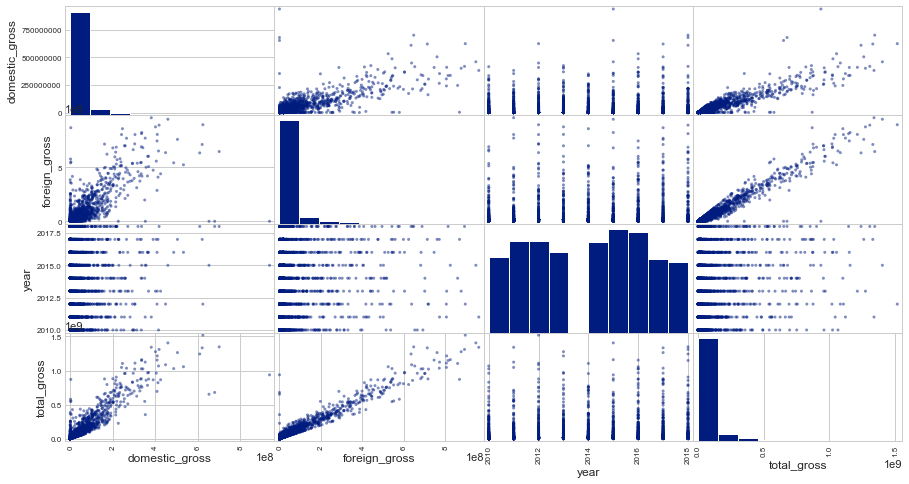

In [35]:
# Relationship Between Variables
plt.style.use('seaborn-dark-palette')
pd.plotting.scatter_matrix(df1,);

In [36]:
# Checking missing values
missing = df2.isna().sum()
missing

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [37]:
# Check for duplicates
dup_data = df2.duplicated().any()
dup_data 

False

#### Data Understanding

In [38]:
# Converting production_budget 'production_budget', 'domestic_gross','worldwide_gross' into float datatype
df2['production_budget'] = df2['production_budget'].str.replace(',','')
df2['production_budget'] = df2['production_budget'].str.replace('$','').astype('float')


In [39]:
df2['domestic_gross'] = df2['domestic_gross'].str.replace(',','')
df2['domestic_gross'] = df2['domestic_gross'].str.replace('$','').astype('float')

In [40]:
df2['worldwide_gross'] = df2['worldwide_gross'].str.replace(',','')
df2['worldwide_gross'] = df2['worldwide_gross'].str.replace('$','').astype('float')

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [43]:
df2.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [44]:
# Define a function called Plot_boxplt
def plot_boxplt(df,ft):
    df.boxplot(column = [ft])
    plt.grid(False)
    plt.show()

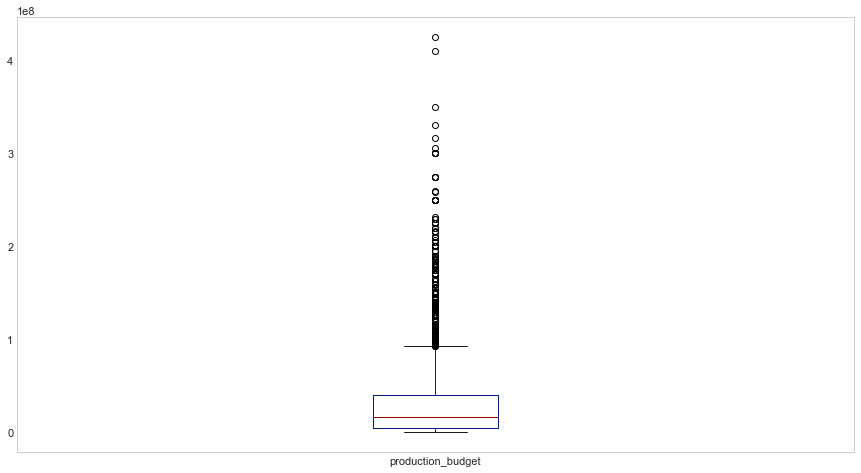

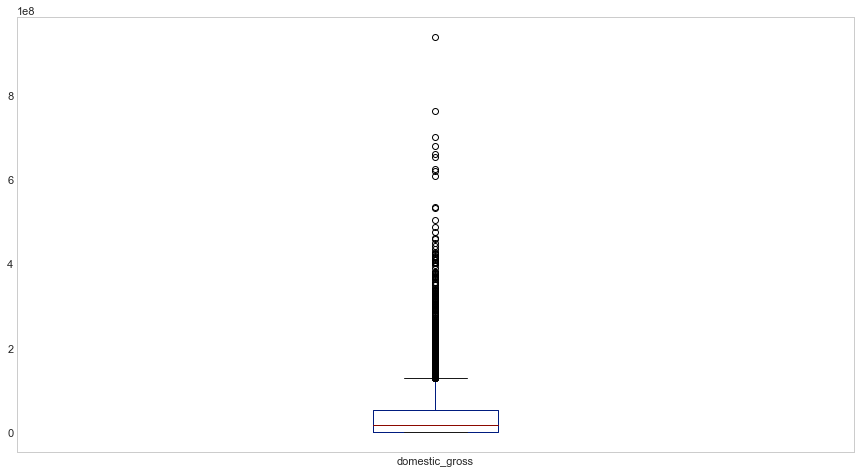

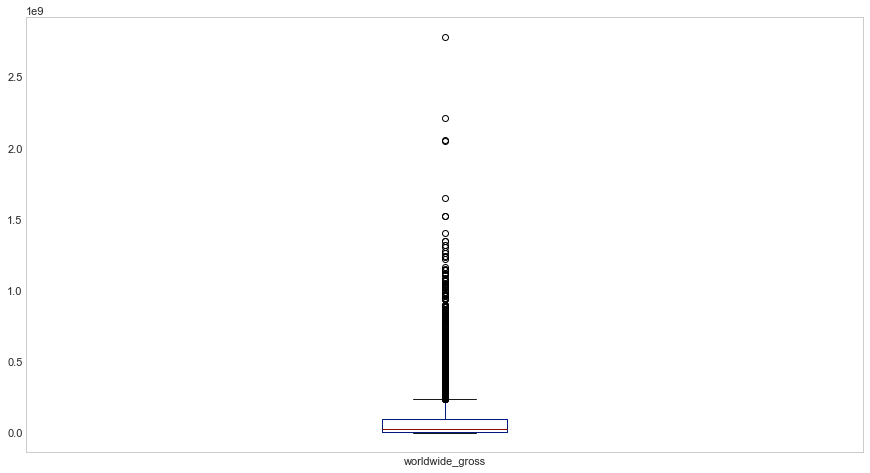

In [45]:
#Generate boxplots
plot_boxplt (df2, 'production_budget')
plot_boxplt (df2, 'domestic_gross')
plot_boxplt (df2, 'worldwide_gross')


In [46]:
#Define a function that returns a list of outlier indices
def outliers (df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR

    ls = df.index[(df[ft] < lower_bound)| (df[ft] > upper_bound)]
    
    return ls
    

In [60]:
# Number of production_budget outliers
product_budget_list = []
for i in ['production_budget']:
    product_budget_list.extend (outliers(df2,'production_budget'))
len('production_budget_list')

22

In [63]:
# Number of domestic_gross outliers
domestic_gross_list = []
for i in ['domestic_gross']:
    domestic_gross_list.extend (outliers(df2,'domestic_gross'))
len('domestic_gross_list')

19

In [65]:
# Worldwide outliers
worldwide_gross_list = []
for i in ['worldwide_gross']:
    worldwide_gross_list.extend (outliers(df2,'worldwide_gross'))
len('worldwide_gross_list')

20

We remove the outliers in the production_budget and worldwide_gross as the are minimal. However we will not remove those in the domestic gross as they are too many and will affect the data analysis.

In [54]:
# Defining a funtion to remove outliers
def remove (df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return(df)

In [66]:
#removing product_budget outliers
df2_clean = remove(df2,'product_budget_list')
df2_clean.shape

KeyError: "['_', 'b', 'c', 'd', 'e', 'g', 'i', 'l', 'o', 'p', 'r', 's', 't', 'u'] not found in axis"

#### Data Analysis

In [ ]:
# Adding necessary